In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/Users/kshitij/Desktop/test_data_evaluation_part2.csv',sep=(',')).dropna()
df = df.sample(frac=0.01, random_state=99)

In [3]:
df.shape

(10, 30)

In [4]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Total Revenue
891,83482,ESP,39.0,1,0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
50,82641,PRT,48.0,10,29,59.0,7.0,0,0,1,...,0,0,0,0,0,0,0,0,0,66.0
557,83148,USA,14.0,3,0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
312,82903,CHN,29.0,5,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
999,83590,IRL,13.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0


Text(0, 0.5, 'Frequency')

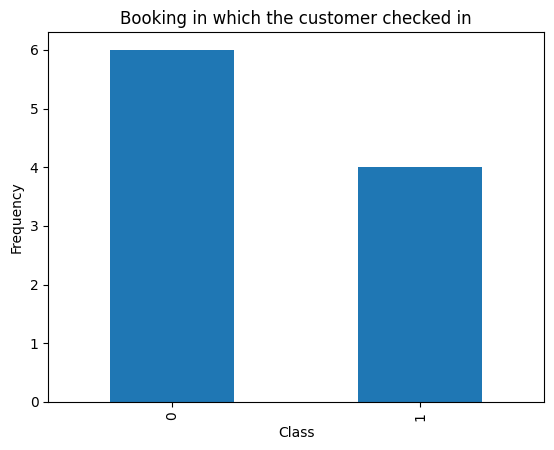

In [5]:
count_classes = pd.value_counts(df['BookingsCheckedIn'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Booking in which the customer checked in")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [6]:
df.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
Total Revenue           0
dtype: int64

In [7]:
df.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
Total Revenue           float64
dtype: object

In [8]:
cols_to_drop = ['Unnamed: 0', 'BookingsCanceled', 'BookingsNoShowed', 'ID']
df.drop(cols_to_drop, axis=1, inplace=True)


KeyError: "['Unnamed: 0'] not found in axis"

In [9]:
cols_to_drop = ['SRNoAlcoholInMiniBar', 'SRAwayFromElevator', 'SRNearElevator', 'SRCrib', 'SRShower', 'SRBathtub', 'SRMediumFloor', 'SRAccessibleRoom', 'SRLowFloor', 'SRHighFloor']
df.drop(cols_to_drop, axis=1, inplace=True)

In [10]:
cols_to_drop = ['Nationality']
df.drop(cols_to_drop, axis=1, inplace=True)

In [11]:
cols_to_drop = ['DistributionChannel','MarketSegment']
df.drop(cols_to_drop, axis=1, inplace=True)

In [12]:
df.head()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRKingSizeBed,SRTwinBed,SRQuietRoom,Total Revenue
891,83482,39.0,1,0,0.0,0.0,0,0,0,0,0,-1,-1,1,0,0,0.0
50,82641,48.0,10,29,59.0,7.0,0,0,1,1,1,11,11,0,0,0,66.0
557,83148,14.0,3,0,0.0,0.0,0,0,0,0,0,-1,-1,1,0,0,0.0
312,82903,29.0,5,0,0.0,0.0,0,0,0,0,0,-1,-1,0,1,0,0.0
999,83590,13.0,0,0,0.0,0.0,0,0,0,0,0,-1,-1,0,1,0,0.0


Text(0.5, 1.0, 'Correlation between different fearures')

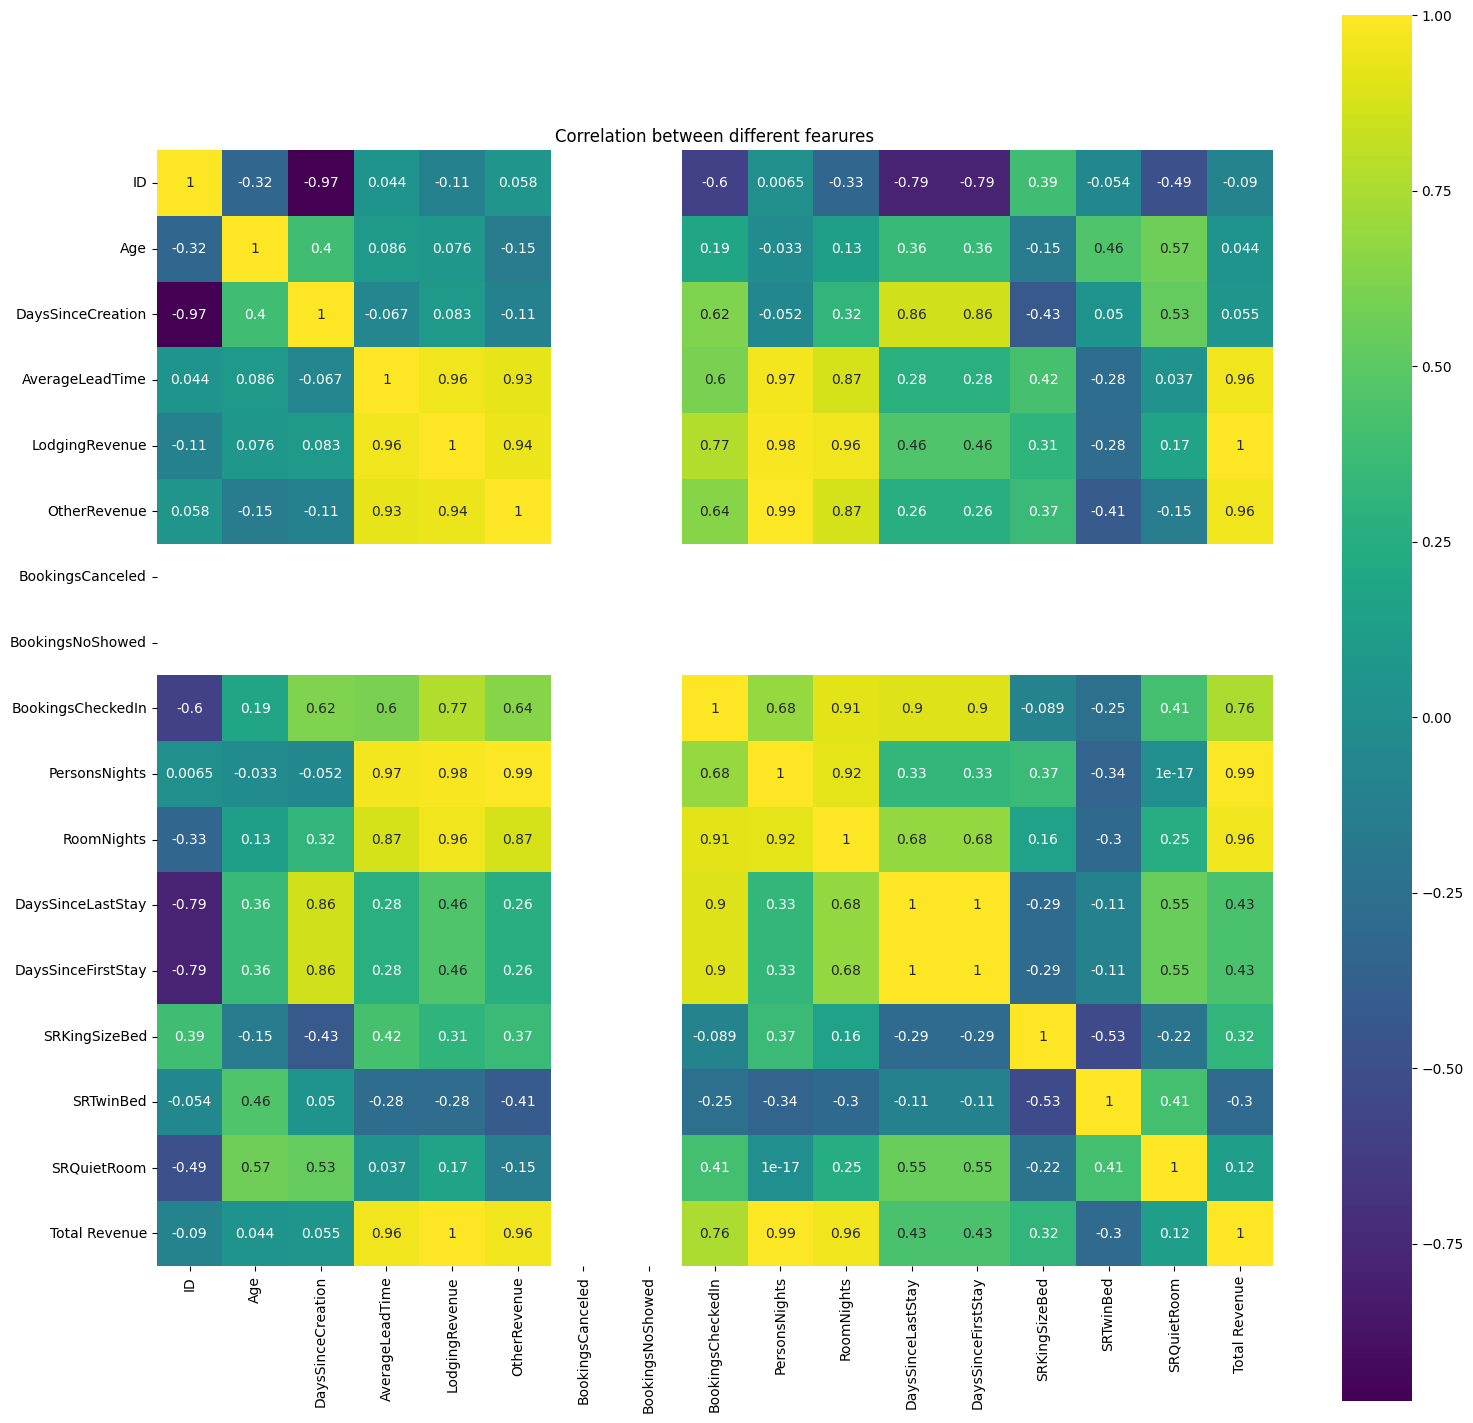

In [13]:
correlation = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [14]:
booking_indices = df[df.BookingsCheckedIn == 1].index
random_indices = np.random.choice(booking_indices, len(df.loc[df.BookingsCheckedIn == 1]), replace=False)
booking_sample = df.loc[random_indices]

not_booking = df[df.BookingsCheckedIn == 0].index
random_indices = np.random.choice(not_booking, sum(df['BookingsCheckedIn']), replace=False)
not_booking_sample = df.loc[random_indices]

df_new = pd.concat([not_booking_sample, booking_sample], axis=0)

print("Percentage of not booking clicks: ", len(df_new[df_new.BookingsCheckedIn == 0])/len(df_new))
print("Percentage of booking clicks: ", len(df_new[df_new.BookingsCheckedIn == 1])/len(df_new))
print("Total number of records in resampled data: ", len(df_new))

Percentage of not booking clicks:  0.5
Percentage of booking clicks:  0.5
Total number of records in resampled data:  8


In [15]:
df_new = df_new.sample(frac=1).reset_index(drop=True)

In [16]:
X = df_new.loc[:, df_new.columns != 'BookingsCheckedIn']
y = df_new.loc[:, df_new.columns == 'BookingsCheckedIn']

In [17]:
X.head()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRKingSizeBed,SRTwinBed,SRQuietRoom,Total Revenue
0,83482,39.0,1,0,0.00,0.0,0,0,0,0,-1,-1,1,0,0,0.00
1,83590,13.0,0,0,0.00,0.0,0,0,0,0,-1,-1,0,1,0,0.00
2,82680,74.0,9,28,89.00,1.0,0,0,1,1,10,10,0,1,1,90.00
3,82641,48.0,10,29,59.00,7.0,0,0,1,1,11,11,0,0,0,66.00
4,82954,4.0,5,13,87.75,18.0,0,0,2,1,6,6,0,0,0,105.75


In [18]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.14124637,  0.34428793, -0.93094934, -0.56633074, -0.74317118,
        -0.60665214,  0.        ,  0.        , -0.65094455, -0.89802651,
        -0.88259602, -0.88259602,  1.29099445, -0.77459667, -0.37796447,
        -0.72876249],
       [ 1.46118046, -0.89039982, -1.21739529, -0.56633074, -0.74317118,
        -0.60665214,  0.        ,  0.        , -0.65094455, -0.89802651,
        -0.88259602, -0.88259602, -0.77459667,  1.29099445, -0.37796447,
        -0.72876249],
       [-1.23456048,  2.00636759,  1.36061826, -0.00993563,  0.32871757,
        -0.53580226,  0.        ,  0.        , -0.13018891,  0.53881591,
         1.40177016,  1.40177016, -0.77459667,  1.29099445,  2.64575131,
         0.20463428],
       [-1.35009223,  0.77167984,  1.64706421,  0.00993563, -0.03259325,
        -0.11070295,  0.        ,  0.        , -0.13018891,  0.53881591,
         1.60943981,  1.60943981, -0.77459667, -0.77459667, -0.37796447,
        -0.04427153],
       [-0.42287584, -1.31779173,  0

In [19]:
pca = PCA(n_components=8)
pca.fit(X)

PCA(n_components=8)

In [20]:
pca = PCA(n_components=8)
pca.fit(X)

PCA(n_components=8)

In [21]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([ 45.3,  79.6,  89.1,  96.1,  98.2,  99.8, 100. , 100. ])

In [22]:
pca = PCA(n_components=8)
pca.fit(X)

PCA(n_components=8)

In [23]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([ 45.3,  79.6,  89.1,  96.1,  98.2,  99.8, 100. , 100. ])

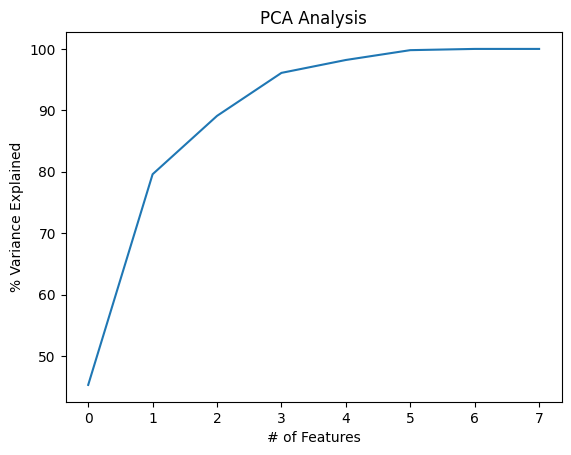

In [24]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape

(5, 16)

In [26]:
pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy', accuracy_score(y_test, y_pred))

[[1 0]
 [1 1]]
Accuracy 0.6666666666666666


/var/folders/kz/t3pkn6m105j50tlf4jv563d40000gn/T/ipykernel_4377/1453071118.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


In [27]:
pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy', accuracy_score(y_test, y_pred))

[[1 0]
 [1 1]]
Accuracy 0.6666666666666666


/var/folders/kz/t3pkn6m105j50tlf4jv563d40000gn/T/ipykernel_4377/1453071118.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
pca = PCA(n_components=5)
logReg = LogisticRegression() 

pipe = Pipeline([('pca', pca), ('logistic', logReg)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy', accuracy_score(y_test, y_pred))

[[1 0]
 [0 2]]
Accuracy 1.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
pca = PCA(n_components=5)
logReg = LogisticRegression() 

pipe = Pipeline([('pca', pca), ('logistic', logReg)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy', accuracy_score(y_test, y_pred))

[[1 0]
 [0 2]]
Accuracy 1.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
